# R kernel

In [1]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(gridExtra)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(rstatix)
library(SeuratDisk)
library(Seurat)
}) 

In [2]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

## Fig.S10B

In [10]:
Tcells_celltype_order = c("Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT")
Bcells_celltype_order = c("Bn","B_ABC","B_IFN","B_STR","B_preGC","Plasma")
Myeloid_celltype_order = c("Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC")
subtype_order = c(Tcells_celltype_order, 'NK cells', Bcells_celltype_order, Myeloid_celltype_order)

T_color = c("#E69F00", "#56B4E9", "#F0E442", "#009E73",  "#0072B2", "#D55E00", "#CC79A7",'#BCBD22', "#999999")
B_color = c('#17BECF','#20854E', '#BC3C29','#FFDC91','#7876B1','#ff7f0e','#6F99AD','#EE4C97')
Mac_color = c('#BFA6C9','#59a14f', '#EB5291FF', '#1794CEFF','#FBBB68FF', '#972C8DFF','#F5BACFFF', '#9DDAF5FF', '#6351A0FF',  '#9c755f',  '#BFA6C9')
NK_color = c('NK cells' = '#9467BD')
T_color <- setNames(T_color, Tcells_celltype_order)
B_color <- setNames(B_color, Bcells_celltype_order)
Mac_color <- setNames(Mac_color, Myeloid_celltype_order)
color = c(T_color, NK_color, B_color, Mac_color)

In [8]:
merge_leiden_cluster = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Immu_Merge_leiden_cluster_metadata.csv",head=T)

In [9]:
merge_leiden_cluster$subtype = gsub("B_ATM", "B_ABC", merge_leiden_cluster$subtype)
merge_leiden_cluster$subtype = gsub("B_GC", "B_preGC", merge_leiden_cluster$subtype)

In [11]:
all_stats <- merge_leiden_cluster %>%
  group_by(leiden_merged_1, subtype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
all_stats$subtype = factor(all_stats$subtype , levels=subtype_order)

`summarise()` has grouped output by 'leiden_merged_1'. You can override using
the `.groups` argument.


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b4>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'γδT' in 'mbcsToSbcs': dot substituted for <b3>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x

png 
  2

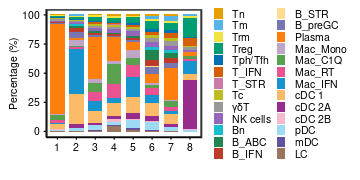

In [13]:
All_plot = ggplot(all_stats,aes(x=as.character(leiden_merged_1),y=percentage,fill=subtype)) +
    geom_bar(stat = "identity",width=0.7) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_fill_manual(values=color) +
    mytheme()
options(repr.plot.width= 3,repr.plot.height = 1.5)
All_plot
pdf("../../figures/Cellbin_immunecell_subtype_leiden_merge_cluster_barplot.pdf",w=3,h=1.5)
All_plot
dev.off()

## Fig.S10C

In [24]:
all_stats = read.csv('../Figure5/immune_subtype_ratio_nonTLS_TLS.csv', head=T)

In [25]:
color = c('TLS'='#298c8c', 'Non-TLS'='#f1a226')

sub_data = all_stats[all_stats$subtype %in% c('NK cells', 'Plasma', Myeloid_celltype_order), ]
sub_data$subtype = factor(sub_data$subtype, levels = c('NK cells', 'Plasma', Myeloid_celltype_order))


stat.test <- sub_data %>% 
group_by(subtype) %>%
wilcox_test(percentage ~ TLS_region,p.adjust.method = "none") 
stat.test <- stat.test %>%
add_xy_position(x='subtype',dodge=0.9)

In [26]:
stat.test$p.format = sprintf("%.4f", stat.test$p)

png 
  2

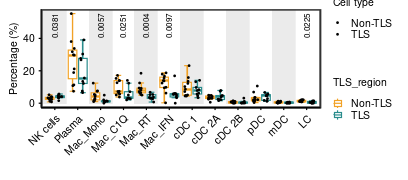

In [10]:
background_colors <- rep(c("lightgray", "white"), length.out = length(c('NK', 'Plasma', Myeloid_celltype_order)))
celltype_bg <- data.frame(
  celltype = levels(sub_data$subtype),
  ymin = -Inf,
  ymax = Inf,
  xmin = 1:length(unique(sub_data$subtype)) - 0.5,
  xmax = 1:length(unique(sub_data$subtype)) + 0.5,
  bg_color = background_colors
)
y_min <- min(sub_data$percentage, na.rm = TRUE)

All_plot = ggplot() + 
    geom_rect(data = celltype_bg,aes(xmin = xmin,xmax = xmax,ymin = y_min,ymax = Inf,fill = bg_color),alpha = 0.3,inherit.aes = FALSE, show.legend = FALSE) +
    scale_fill_manual(values = c('gray' , 'white'),name=NULL) +
    new_scale_fill() +
    stat_boxplot(data = sub_data,aes(x=subtype,y=percentage,color=TLS_region), geom = "errorbar", width=0.5, linewidth=0.25,position=position_dodge(0.9)) +
    geom_boxplot(data = sub_data,aes(x=subtype,y=percentage,color=TLS_region), outlier.shape = NA,size=0.25,position=position_dodge(0.9), outliers = FALSE) +
    geom_point(data = sub_data, aes(x = subtype, y = percentage, fill = TLS_region), size = 0.5, alpha = 1, shape = 19, stroke = NA, color = 'black',position = position_jitterdodge(jitter.width = 0.2, dodge.width = 0.9)) + 
    #stat_pvalue_manual(stat.test,y.position=11.5,label = "p.format",label.size=1, remove.bracket = TRUE, position=position_dodge(0.9)) +
    geom_text(
        data = stat.test[stat.test$p < 0.05,],
        aes(x = subtype, y = 48, label = p.format),
        angle = 90,
        size = 1.6,
        hjust = 0.5,
        vjust = 0.5,
        position = position_dodge(0.9)
    ) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_color_manual(values=color) +
    mytheme() +
    theme(axis.text.x = element_text(angle=45,hjust=1,vjust=1),
         )
options(repr.plot.width= 3.4,repr.plot.height = 1.5)
All_plot

pdf("../../figures/Cellbin_immunecell_subtype_TLS_nonTLS_Other_boxplot.pdf",w=3.4,h=1.5)
All_plot
dev.off()

## Fig.S10D

In [106]:
ST_B_AUC = read.csv("Cellbin_Bcell_AUC_metadata.csv",head=T)

In [107]:
ST_B_AUC_select = ST_B_AUC %>% dplyr::select(c("BATF",'TFEB','subtype'))
ST_B_AUC_select = melt(ST_B_AUC_select)
ST_B_AUC_select$subtype = factor(ST_B_AUC_select$subtype, levels=subtype_order)

Using subtype as id variables



In [108]:
test_result = ST_B_AUC_select %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  group_by(variable) %>%
  dunn_test(value ~ subtype)
test_result = test_result[test_result$p.adj < 0.05, ]
test_result$p.format = sprintf("%.2e", test_result$p.adj)
test_result <- test_result %>% mutate(y.position = c(0.4, 0.45, 0.5, 0.55,0.6, 0.65, 0.17, 0.2, 0.23,0.26,0.29,0.32,0.35))

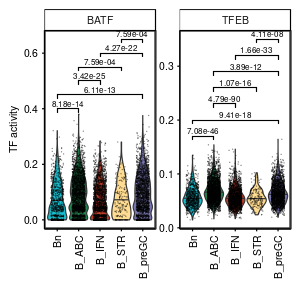

In [109]:
plot = ggplot(ST_B_AUC_select, aes(x=subtype,y=value,fill=subtype)) +   
    facet_wrap(.~variable, ncol=2, scale='free') +
    geom_violin(scale='width', lwd=0.25,draw_quantiles = 0.5) + 
    geom_jitter(size=0.1,shape=19, stroke=NA,width=0.3,color='black',alpha=0.5) +
    #stat_compare_means(comparisons=list(c('B_ATM','Bn'),c('B_ATM','B_IFN'),c('B_ATM','B_GC'),c('B_ATM','B_STR')), size=1.7, bracket.size=0.25, method='wilcox.test', label = 'p.signif') + 
    stat_pvalue_manual(test_result, label = "p.format", label.size=1.6, hide.ns=T, bracket.size=0.25, tip.length = 0.02, inherit.aes = FALSE) +
    labs(x="",y='TF activity') +
    scale_fill_manual(values=B_color) +
    mytheme() + 
    theme(axis.text.x = element_text(angle=90,hjust=1,vjust=0.5),
    legend.position = 'none',
    strip.background=element_rect(linewidth=0.25, color='black', fill="white")
)

options(repr.plot.width =2.5,repr.plot.height = 2.5)
plot

# pdf("../../figures/Cellbin_Bcell_BATF_TFEB_AUC_vlnplot.pdf",w=2.5,h=2.5)
# plot
# dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import warnings
warnings.filterwarnings('ignore')
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Fig.S10A

In [14]:
T_adata = sc.read('../T_adata.h5ad')
sc.pp.normalize_total(T_adata, target_sum=10000)
sc.pp.log1p(T_adata)

In [15]:
Tcells_celltype_order = ["Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT"]
T_adata.obs['subtype'] = pd.Categorical(T_adata.obs['subtype'], categories=Tcells_celltype_order)

In [16]:
Tcells_marker_gene = [
    'SELL','LEF1',"CCR7",
    "GPR183","IL7R","FOXP1",
    "LGALS3","MT1X","CXCR6",
    "FOXP3","CTLA4","IL2RA",
    "CXCL13","NMB","FABP5",
    "IFI44L","MX1","IFIT1",
    'NR4A1',"BAG3","FOS",
    "GZMB","GZMK","NKG7",
    "XCL1","TRGC2","TRGC1"
]

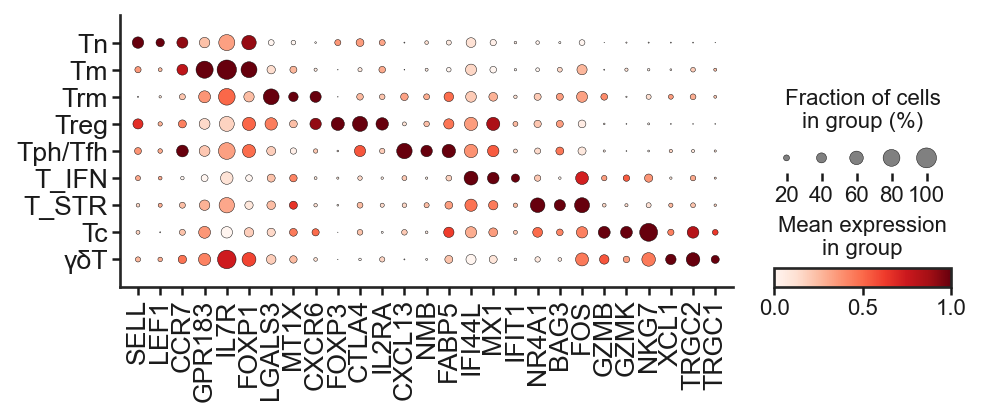

In [31]:
axes_dict = sc.pl.dotplot(T_adata, Tcells_marker_gene, groupby='subtype', figsize=(6.7,2.2), standard_scale='var',show=False, return_fig=True, use_raw=False)
axes_dict.style(largest_dot=80, cmap='Reds')
main_ax = axes_dict.get_axes()['mainplot_ax']
main_ax.tick_params(axis='both', labelsize=12)
main_ax.figure.savefig(f'../../figures/Tcells_subtype_dotplot.pdf')
#axes_dict.show()

In [20]:
B_adata = sc.read("../B_adata.h5ad")
sc.pp.normalize_total(B_adata, target_sum=10000)
sc.pp.log1p(B_adata)

In [21]:
Bcells_celltype_order = ["Bn","B_ABC","B_IFN","B_STR","B_preGC","Plasma"]
B_adata.obs['subtype'] = pd.Categorical(B_adata.obs['subtype'], categories=Bcells_celltype_order)

In [22]:
Bcells_marker_gene = [
    "TCL1A","IGHD","FCER2",
    "DUSP4",'ZEB2',
    "IFIT3","ISG20","IFITM1",
    "HSPA1A","HSPA1B","DNAJB1",
    "BCL2A1","ZBTB32","MIR155HG",
    "MZB1","JCHAIN"
]

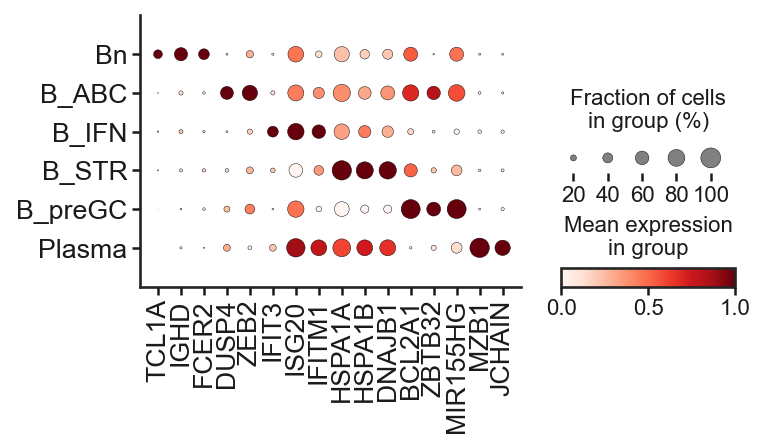

In [32]:
axes_dict = sc.pl.dotplot(B_adata, Bcells_marker_gene, groupby='subtype', figsize=(4.8,2.2), standard_scale='var',show=False, return_fig=True, use_raw=False)
axes_dict.style(largest_dot=80, cmap='Reds')
main_ax = axes_dict.get_axes()['mainplot_ax']
main_ax.tick_params(axis='both', labelsize=12)
main_ax.figure.savefig(f'../../figures/Bcells_subtype_dotplot.pdf')
#axes_dict.show()

In [26]:
Myeloid_adata = sc.read("../Myeloid_adata.h5ad")
sc.pp.normalize_total(Myeloid_adata, target_sum=10000)
sc.pp.log1p(Myeloid_adata)

In [27]:
Myeloid_celltype_order = ["Mac_Mono","Mac_C1Q","Mac_RT","Mac_IFN","cDC 1","cDC 2A","cDC 2B","pDC",'mDC',"LC"]
Myeloid_adata.obs['subtype'] = pd.Categorical(Myeloid_adata.obs['subtype'], categories=Myeloid_celltype_order)

In [28]:
Myeloid_marker_gene = [
    "S100A8","S100A9","FCN1",
    "C1QA","C1QB","C1QC",
    "CTSL","MMP9","HMOX1",
    "CXCL10","CCL3L1","CXCL11",              
    "CLEC9A","WDFY4","DNASE1L3",
    "FSCN1","LAMP3","CD200",
    "CLEC10A","CD1C","FCER1A",
    "TCF4","IL3RA","TRPM4",
    "CCR7","ITGB8",                       
    "CD207","CD1A","HLA-DQB2"
]

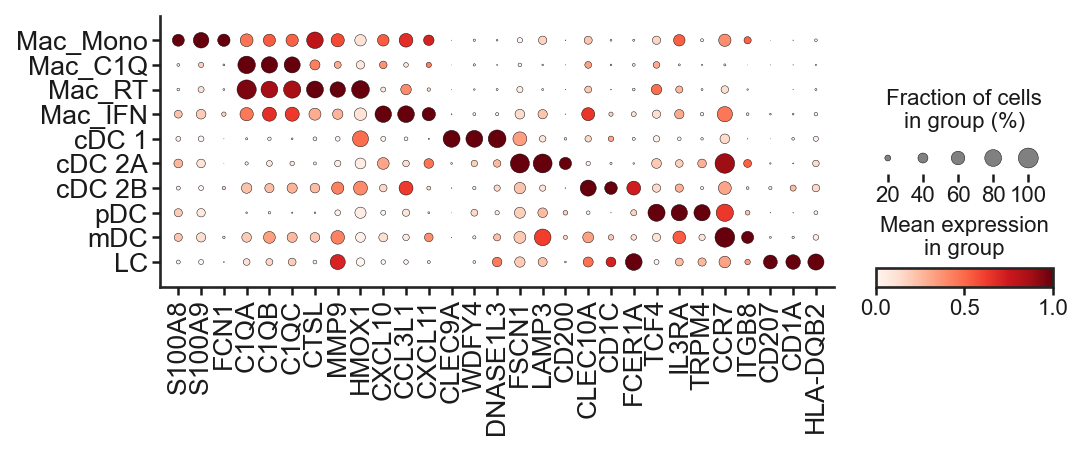

In [33]:
axes_dict = sc.pl.dotplot(Myeloid_adata, Myeloid_marker_gene, groupby='subtype', figsize=(7.2,2.2), standard_scale='var',show=False, return_fig=True, use_raw=False)
axes_dict.style(largest_dot=80, cmap='Reds')
main_ax = axes_dict.get_axes()['mainplot_ax']
main_ax.tick_params(axis='both', labelsize=12)
main_ax.figure.savefig(f'../../figures/Macrophage_subtype_dotplot.pdf')
#axes_dict.show()

## Fig.S10E

In [6]:
Tcells_celltype_order = ["Tn","Tm","Trm","Treg","Tph/Tfh","T_IFN","T_STR","Tc","γδT"]
Bcells_celltype_order = ["Bn","B_ABC","B_IFN","B_STR","B_preGC"]
TB_subtype = Tcells_celltype_order + Bcells_celltype_order

In [7]:
T_adata = sc.read("../T_adata.h5ad")
B_adata = sc.read("../B_adata.h5ad")
T_B_adata = ad.concat([T_adata,B_adata])
sc.pp.normalize_total(T_B_adata, target_sum=10000)
sc.pp.log1p(T_B_adata)
T_B_adata.obs['subtype'] = pd.Categorical(T_B_adata.obs['subtype'], categories= TB_subtype)

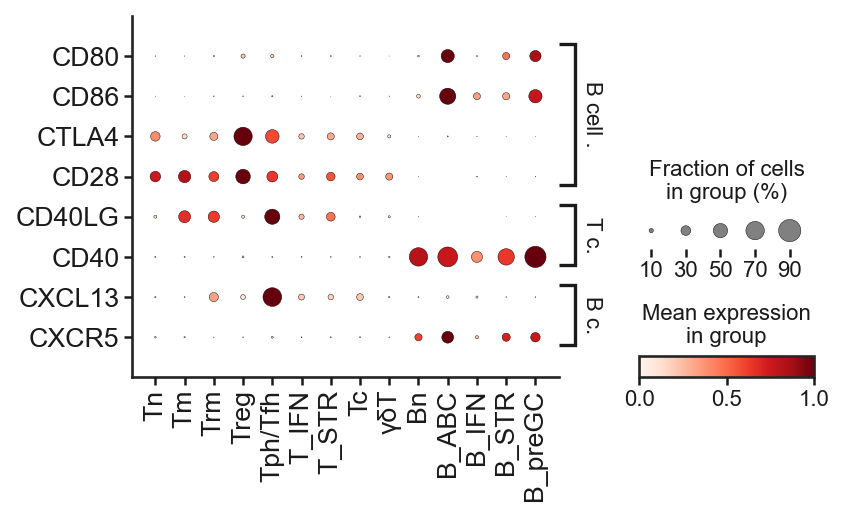

In [13]:
gene = {"B cell activation":["CD80","CD86",'CTLA4','CD28'], 
        "T cell activation":["CD40LG","CD40"],
        "B cell recruitment":["CXCL13","CXCR5"]}
axes_dict = sc.pl.dotplot(T_B_adata, gene, groupby='subtype',  swap_axes=True,figsize=(5.5,2.5), return_fig=True,
              standard_scale='var',show=False,dot_max=0.8,use_raw=False)
axes_dict.style(largest_dot=100, cmap='Reds')
#axes_dict.show()
main_ax = axes_dict.get_axes()['mainplot_ax']
main_ax.tick_params(axis='both', labelsize=12)
main_ax.figure.savefig("../../figures/T_B_ligand_receptor_dotplot.pdf", bbox_inches="tight")